<a href="https://colab.research.google.com/github/Thiago1alberto/googleColab/blob/main/Detec%C3%A7%C3%A3oDeCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from tabulate import tabulate

In [35]:
data = load_breast_cancer()
X = data.data
y = data.target

In [37]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
subset_df = df.head()
print(subset_df.to_markdown(index=False))

|   mean radius |   mean texture |   mean perimeter |   mean area |   mean smoothness |   mean compactness |   mean concavity |   mean concave points |   mean symmetry |   mean fractal dimension |   radius error |   texture error |   perimeter error |   area error |   smoothness error |   compactness error |   concavity error |   concave points error |   symmetry error |   fractal dimension error |   worst radius |   worst texture |   worst perimeter |   worst area |   worst smoothness |   worst compactness |   worst concavity |   worst concave points |   worst symmetry |   worst fractal dimension |   target |
|--------------:|---------------:|-----------------:|------------:|------------------:|-------------------:|-----------------:|----------------------:|----------------:|-------------------------:|---------------:|----------------:|------------------:|-------------:|-------------------:|--------------------:|------------------:|-----------------------:|-----------------:|---------

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [25]:
y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



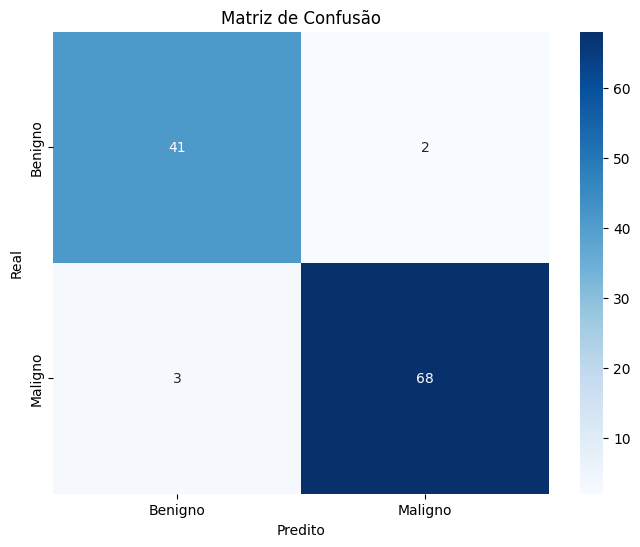

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ['Benigno', 'Maligno']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.96
